![](https://miro.medium.com/max/770/1*yfr3m-JjwQLucxIsThIJGQ.jpeg)


Purpose of this notebook is give a **brief idea on NLP.** As we all know that there are various different approaches to solve any NLP problem. For eg: Frequency based model like Tfidf and various Prediction based model like Word2Vec. <br>  

This tutorial assumes that you've absolutely no prior knowledge of NLP and SPaCy which is a really handy library for performing niche NLP tasks efficiently and gives you alot of flexibility while performing them. <br>

Therefore i decided to make a kernel on **GETTING STARTED IN NLP** <br>

## Give your Upvotes and comment down your suggestion so that we together improve this kernel :)


# NLP Bootcamp: Part 1 of 3

 <a>1. NLP & SPaCy Basics </a> <br>
 <a>2. Parts of Speech</a><br>
 <a>3. Named Entity Recognition</a><br>
 <a>4. Sentence Segmentation</a><br>


# 1. NLP & SPaCy Basics 

In [1]:
import spacy
from spacy import displacy
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from spacy.tokens import Span

In [2]:
#loading the language library
nlp = spacy.load('en_core_web_sm') 
## larger language library can be load via `en_core_web_lg` 

In [3]:
# create your first text document
doc = nlp(u'Google acquired Kaggle for the $500 million a few years ago.')

In [4]:
## token operations
for token in doc:
    print(f'Word: {token.text} \nPart of Speech: {token.pos_} \nSyntactic Dependancy: {token.dep_} \n ****----***')

Word: Google 
Part of Speech: PROPN 
Syntactic Dependancy: nsubj 
 ****----***
Word: acquired 
Part of Speech: VERB 
Syntactic Dependancy: ROOT 
 ****----***
Word: Kaggle 
Part of Speech: PROPN 
Syntactic Dependancy: dobj 
 ****----***
Word: for 
Part of Speech: ADP 
Syntactic Dependancy: prep 
 ****----***
Word: the 
Part of Speech: DET 
Syntactic Dependancy: det 
 ****----***
Word: $ 
Part of Speech: SYM 
Syntactic Dependancy: quantmod 
 ****----***
Word: 500 
Part of Speech: NUM 
Syntactic Dependancy: compound 
 ****----***
Word: million 
Part of Speech: NUM 
Syntactic Dependancy: pobj 
 ****----***
Word: a 
Part of Speech: DET 
Syntactic Dependancy: quantmod 
 ****----***
Word: few 
Part of Speech: ADJ 
Syntactic Dependancy: amod 
 ****----***
Word: years 
Part of Speech: NOUN 
Syntactic Dependancy: npadvmod 
 ****----***
Word: ago 
Part of Speech: ADV 
Syntactic Dependancy: advmod 
 ****----***
Word: . 
Part of Speech: PUNCT 
Syntactic Dependancy: punct 
 ****----***


___
## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Google`|
|`.lemma_`|The base form of the word|`google`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [5]:
##directly accessing tokens via indices
print(doc[2].text,doc[3].pos_)

Kaggle ADP


___
## Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

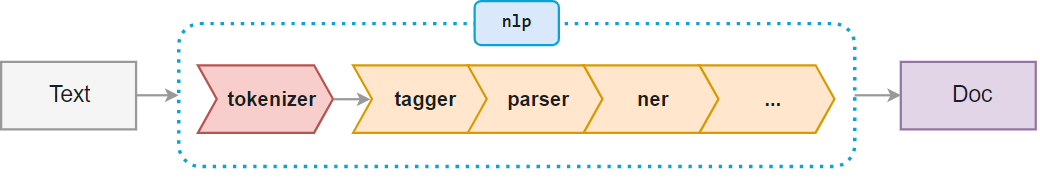

In [6]:
## SPaCy NLP pipeline available operations
nlp.pipe_names

['tagger', 'parser', 'ner']

In [7]:
## Parsing sentences in SPaCy
doc2 = nlp(u'This is the first sentence. This is the second sentence. This is the third sentence. This is the fourth sentence. ')

for sentence in doc2.sents:
    print(f'{sentence}')

This is the first sentence.
This is the second sentence.
This is the third sentence.
This is the fourth sentence.


## Tokenization in detail
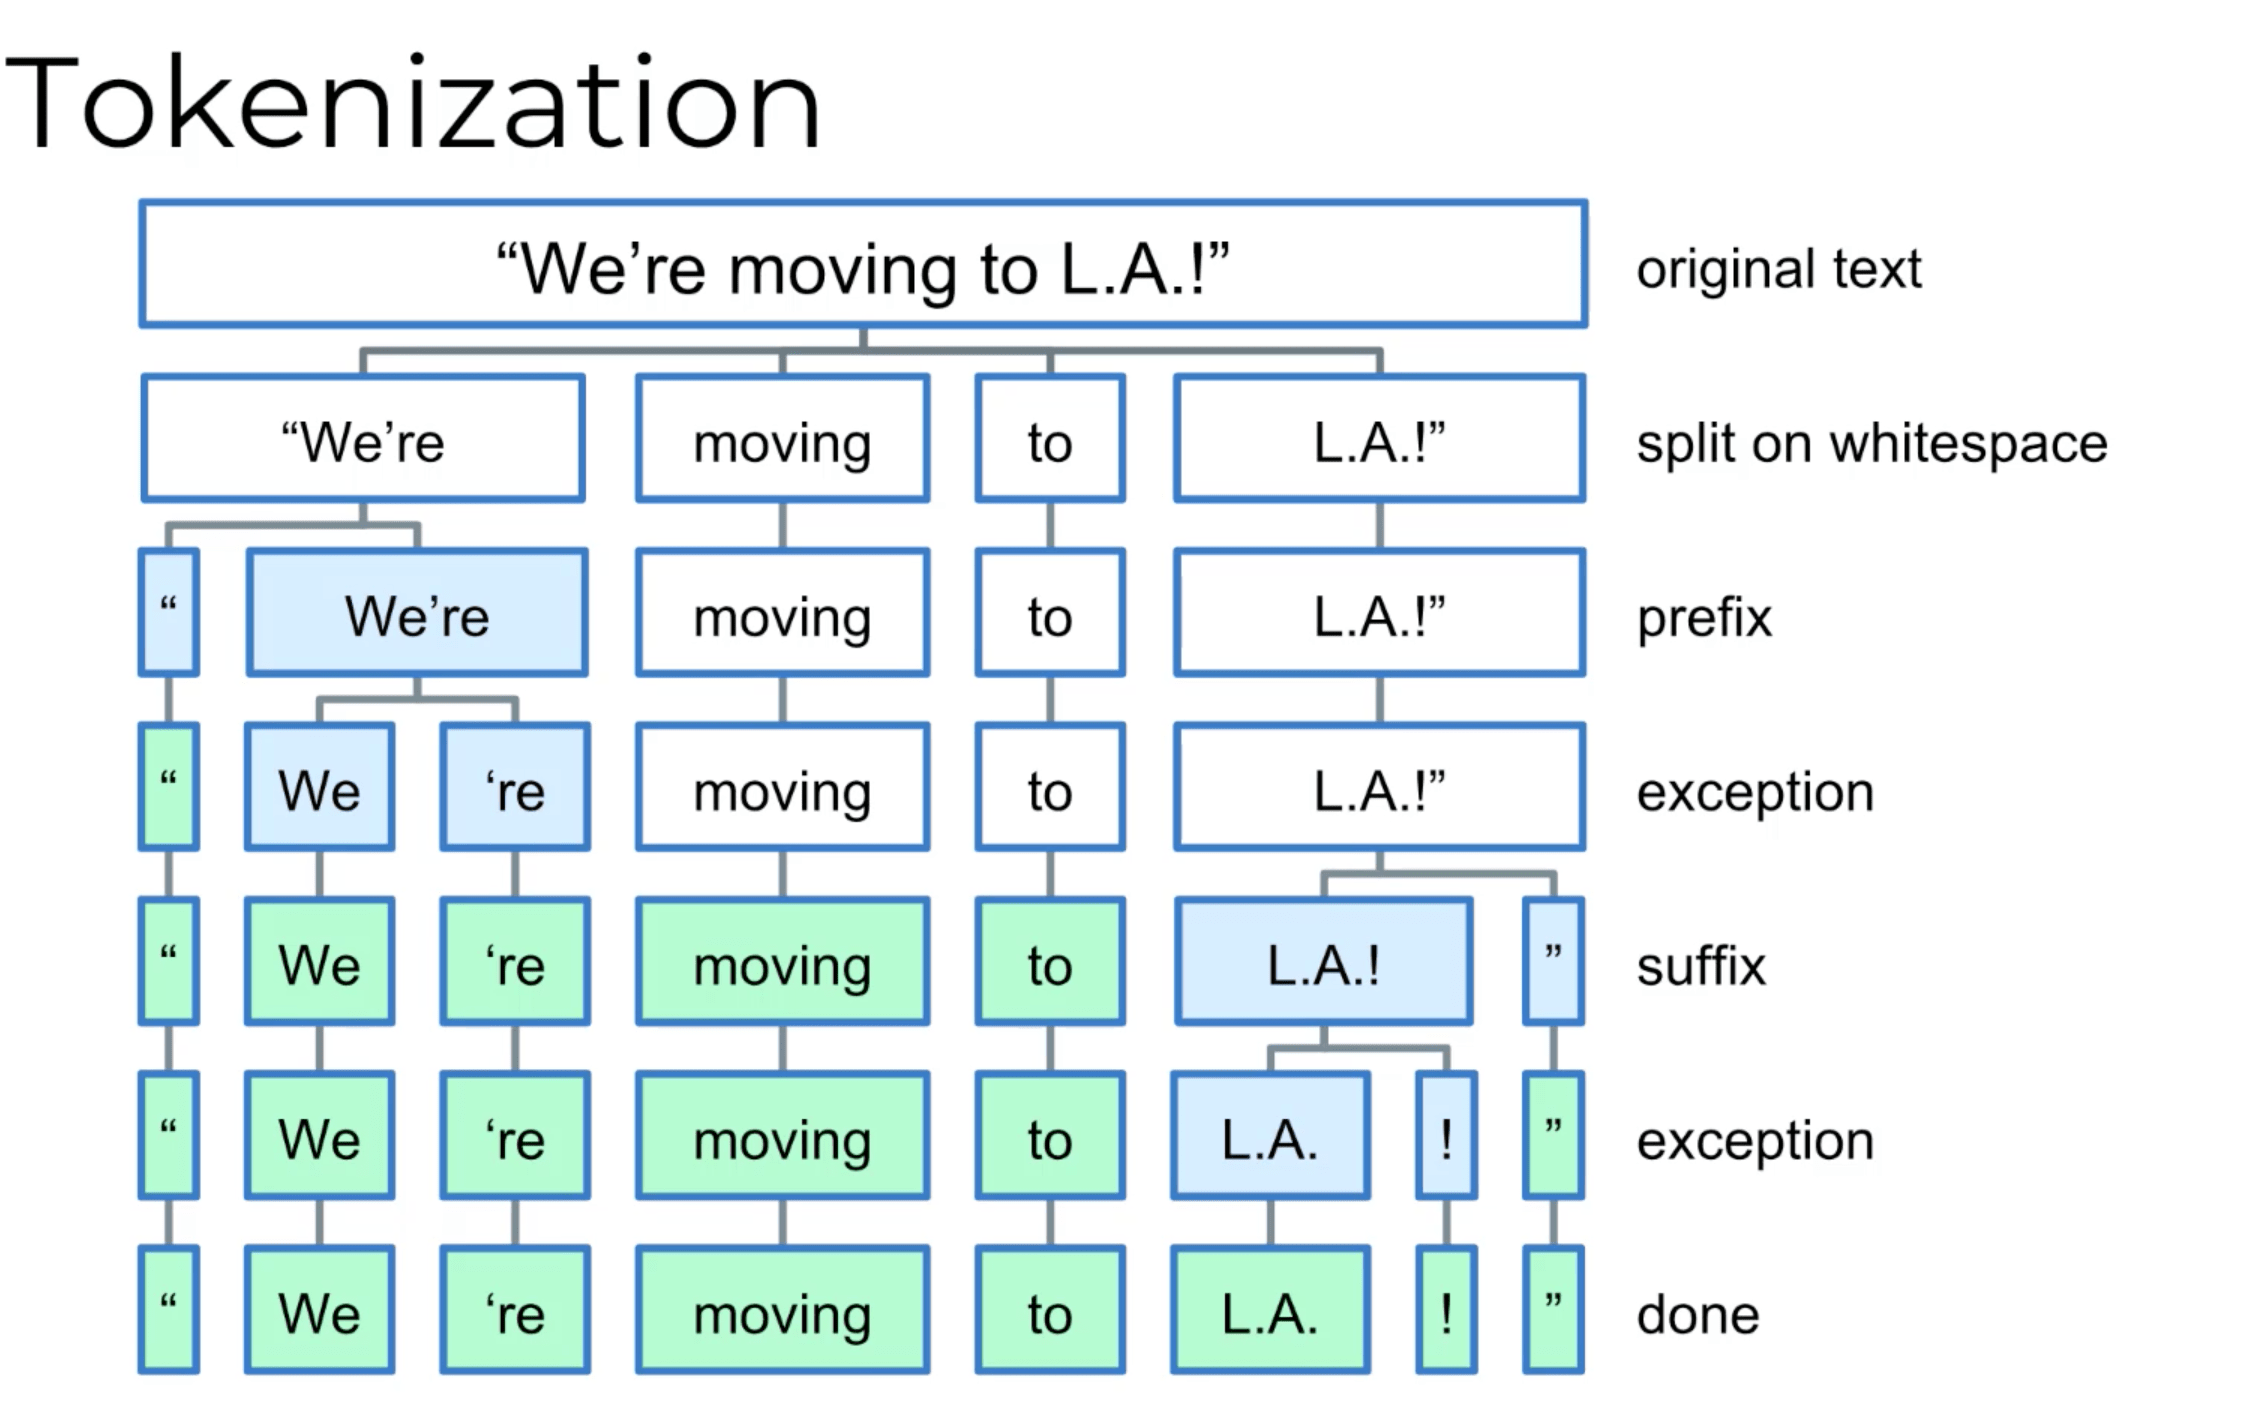

In [8]:
myString = '"We\'re moving to L.A.!"'
doc3 = nlp(myString)
for token in doc3:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


In [9]:
##Prefixes, Suffixes, Infixes
doc4 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc4:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [10]:
## extracting named entities
myString2 = 'Google is going to start a new research lab in Europe by investing $6 million'
doc5 = nlp(myString2)
for entity in doc5.ents:
    print(entity)
    print(entity.label_)
    print(str(spacy.explain(entity.label_)))
    print('****----***')

Google
ORG
Companies, agencies, institutions, etc.
****----***
Europe
LOC
Non-GPE locations, mountain ranges, bodies of water
****----***
$6 million
MONEY
Monetary values, including unit
****----***


## SpaCy Visualization

In [11]:
## visualizing syntatic dependencies 
displacy.render(doc5, style='dep', jupyter=True, options={'distance': 50})

In [12]:
## visualizing entities 
displacy.render(doc5, style='ent', jupyter=True, options={'distance': 50})

## Stemming
** there's no stemmer in SPaCy so we're using NLTK**

In [13]:
p_stemmer  = PorterStemmer()
snowball_stemmer = SnowballStemmer(language='english')
words = ['run','runner','runs','easily','fairly']


In [14]:
for word in words:
    print(f'{word} \n snowball: {snowball_stemmer.stem(word)} porter: {p_stemmer.stem(word)}')
    print('****----***')

run 
 snowball: run porter: run
****----***
runner 
 snowball: runner porter: runner
****----***
runs 
 snowball: run porter: run
****----***
easily 
 snowball: easili porter: easili
****----***
fairly 
 snowball: fair porter: fairli
****----***


## Lemmatization

In [15]:
doc5 = nlp(u'he ran with 50 other runners and fairly won the race easily while running continously')
for token in doc5:
    print(f'{token} --> {token.lemma_}')
    print('****----***')

he --> -PRON-
****----***
ran --> run
****----***
with --> with
****----***
50 --> 50
****----***
other --> other
****----***
runners --> runner
****----***
and --> and
****----***
fairly --> fairly
****----***
won --> win
****----***
the --> the
****----***
race --> race
****----***
easily --> easily
****----***
while --> while
****----***
running --> run
****----***
continously --> continously
****----***


as you can see lemmatization is more effective like looking at the words like ``won -> win, running -> run``

## Stop words in SPaCy

In [16]:
list(nlp.Defaults.stop_words)[:10]

['becoming',
 '‘d',
 'until',
 'made',
 'while',
 'by',
 'cannot',
 'first',
 'further',
 'thereafter']

In [17]:
doc6 = nlp(u'btw he is not generous to everyone.')
for word in doc6:
    print(f'{word.text} --> is stopword: {word.is_stop}')

btw --> is stopword: False
he --> is stopword: True
is --> is stopword: True
not --> is stopword: True
generous --> is stopword: False
to --> is stopword: True
everyone --> is stopword: True
. --> is stopword: False


In [18]:
## add your custom stop word
nlp.Defaults.stop_words.add('btw')

In [19]:
for word in doc6:
    print(f'{word.text} --> is stopword: {word.is_stop}')

btw --> is stopword: False
he --> is stopword: True
is --> is stopword: True
not --> is stopword: True
generous --> is stopword: False
to --> is stopword: True
everyone --> is stopword: True
. --> is stopword: False


you can see ``btw`` is now a stop word

# 2. Parts of Speech
___
## Fine-grained Part-of-speech Tags
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

In [20]:
doc7 = nlp(u'The quick brown fox jumped over the lazy dog\'s back.')

In [21]:
for token in doc7:
    print(f'{token.text:{10}}{token.pos_:{10}}{token.tag_:{10}}{spacy.explain(token.tag_)}')

The       DET       DT        determiner
quick     ADJ       JJ        adjective
brown     ADJ       JJ        adjective
fox       NOUN      NN        noun, singular or mass
jumped    VERB      VBD       verb, past tense
over      ADP       IN        conjunction, subordinating or preposition
the       DET       DT        determiner
lazy      ADJ       JJ        adjective
dog       NOUN      NN        noun, singular or mass
's        PART      POS       possessive ending
back      NOUN      NN        noun, singular or mass
.         PUNCT     .         punctuation mark, sentence closer


In [22]:
pos_counts = doc7.count_by(spacy.attrs.POS)
for key,value in sorted(pos_counts.items()):
    print(f'{doc7.vocab[key].text} {value}')

ADJ 3
ADP 1
DET 2
NOUN 3
PART 1
PUNCT 1
VERB 1


In [23]:
## visualizing POS tags
displacy.render(doc7, style='dep', jupyter=True, options={'distance': 50})

___
## Customizing the Appearance
Besides setting the distance between tokens, you can pass other arguments to the `options` parameter:

<table>
<tr><th>NAME</th><th>TYPE</th><th>DESCRIPTION</th><th>DEFAULT</th></tr>
<tr><td>`compact`</td><td>bool</td><td>"Compact mode" with square arrows that takes up less space.</td><td>`False`</td></tr>
<tr><td>`color`</td><td>unicode</td><td>Text color (HEX, RGB or color names).</td><td>`#000000`</td></tr>
<tr><td>`bg`</td><td>unicode</td><td>Background color (HEX, RGB or color names).</td><td>`#ffffff`</td></tr>
<tr><td>`font`</td><td>unicode</td><td>Font name or font family for all text.</td><td>`Arial`</td></tr>
</table>

For a full list of options visit https://spacy.io/api/top-level#displacy_options


In [24]:
options = {'distance': 80, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}
displacy.render(doc7, style='dep', options=options)

# 3. Named Entity Recognition

Entities refer to name of a person, place, time etc, which can be really the decision making piece of information in the paradigm of NLP.
## NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

In [25]:
def show_ners(doc):
    if doc.ents:
        for ent in doc.ents:
            print(f'{ent.text:{10}} {str(spacy.explain(ent.label_)):{10}}')
    else:
        print('now entities found...')

In [26]:
show_ners(nlp(u'hi! how are you?'))

now entities found...


In [27]:
show_ners(nlp(u'In London I read the Harry Potter last week that was pretty interesting and fascinating, \
I loved Hogwarts school.'))

London     Countries, cities, states
last week  Absolute or relative dates or periods
Hogwarts   Companies, agencies, institutions, etc.


In [28]:
## add custom entities to your vocabulary
## I'll be adding OpenAI as a company

doc10 = nlp(u'In America, OpenAI is doing state-of-the-art research in reinforcement learning and Computer Science')
ORG = doc10.vocab.strings[u'ORG']
new_ent = Span(doc10,0,1,label=ORG)
doc10.ents = list(doc10.ents) + [new_ent]

In [29]:
show_ners(doc10)

In         Companies, agencies, institutions, etc.
America    Countries, cities, states


In [30]:
## visualizing NERs
doc11 = nlp(u'Google is going to start a new research lab in Europe by investing $6 million')
options = {'ents': ['ORG', 'PRODUCT']}

In [31]:
displacy.render(doc11, style='ent', jupyter=True, options=options)

# 4. Sentence Segmentation

starting sentences of custom rules

In [32]:
def set_custom_boundaries(doc):
    for token in doc[:-1]: #so that we can't get index out of range
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc


In [33]:
nlp.add_pipe(set_custom_boundaries, before='parser') #runs before parser in the pipeline

In [34]:
doc12 = nlp(u'Management is doing things right; leadership is doing the right things. -PeterDrucker')

for sent in doc12.sents:
    print(sent)

Management is doing things right;
leadership is doing the right things. -PeterDrucker


That's all for the first part of this tutorial coming up in the second part of tutorial is:

* **Text Classification**
* **Semantics & Sentiment Analysis**
* **Topic Modelling**

# PLEASE UPVOTE IF THIS KERNEL HELPED YOU. STAY TUNED!!